In [114]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import regex as re
from skimpy import clean_columns
plt.rcParams["figure.figsize"] = (8, 5)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)


In [115]:
filepath='/Users/hamzaensar/Desktop/Bootcamp/as24_cars.json'

df=pd.read_json(filepath)

In [116]:
df1=df.copy()

In [117]:
df1

,make_model,short_description,make,model,location,price,Body type,Type,Doors,Country version,Offer number,Warranty,Mileage,First registration,Gearbox,Fuel type,Colour,Paint,desc,seller,Seats,Power,Engine size,Gears,CO₂-emissions,Manufacturer colour,Drivetrain,Cylinders,Fuel consumption,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,\nExtras\n,Empty weight,Model code,General inspection,Last service,Full service history,Non-smoker vehicle,Emission class,Emissions sticker,Upholstery colour,Upholstery,Production date,Previous owner,Other fuel types,Power consumption,Energy efficiency class,CO₂-efficiency,Fuel consumption (WLTP),CO₂-emissions (WLTP),Available from,Taxi or rental car,Availability,Last timing belt change,Electric Range (WLTP),Power consumption (WLTP),Battery Ownership
0,Mercedes-Benz A 160,CDi,\nMercedes-Benz\n,"[\n, A 160 ,\n]","P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","€ 16,950.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7468157, \n]","[\n, 24 months, \n]","120,200 km",06/2016,[\nManual\n],Diesel,Black,Metallic,"[ , Precio al contado: 16950 euros, , , Vehí...",Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,\nMercedes-Benz\n,"[\n, EQE 350 ,\n]","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","€ 80,900.-","[\n, Compact, \n]","[\n, Pre-registered, \n]","[\n, 4, \n]","[\n, Spain, \n]","[\n, 7054863, \n]","[\n, 24 months, \n]","5,000 km",06/2022,[\nAutomatic\n],Electric,NaN,NaN,"[ , Precio al contado: 88900 euros, , AUTO OJ...",Dealer,"[\n, 5, \n]",[\n215 kW (292 hp)\n],[\n1 cc\n],[\n9\n],0 g/km (comb.),Negro Obsidiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,\nMercedes-Benz\n,"[\n, A 45 AMG ,\n]","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","€ 69,900.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7410454, \n]","[\n, 12 months, \n]","18,900 km",07/2020,[\nAutomatic\n],Gasoline,Grey,NaN,"[Gris MANUFAKTUR mountaingrau magno, , Linea/...",Dealer,"[\n, 5, \n]",[\n310 kW (421 hp)\n],"[\n1,991 cc\n]",[\n8\n],NaN,Mountaingrau magno,"[\n, 4WD, \n]",[\n4\n],"[[8.4 l/100 km (comb.)], [10.9 l/100 km (city)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,\nMercedes-Benz\n,"[\n, A 35 AMG ,\n]","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","€ 46,990.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7464503, \n]","[\n, 12 months, \n]","18,995 km",01/2020,[\nAutomatic\n],Gasoline,Yellow,NaN,"[ , Precio al contado: 48990 euros, , , BONI...",Dealer,"[\n, 5, \n]",[\n225 kW (306 hp)\n],"[\n1,991 cc\n]",[\n7\n],NaN,Amarillo Sol,"[\n, 4WD, \n]",[\n4\n],"[[7.3 l/100 km (comb.)], [9.3 l/100 km (city)]...","[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E...",[Sport seats],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,\nMercedes-Benz\n,"[\n, A 45 AMG ,\n]","CARRIL ARAGONES 4, 30007 CASILLAS, ES","€ 16,800.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7127931, \n]","[\n, 12 months, \n]","197,000 km",09/2015,[\nAutomatic\n],Diesel,White,Metallic,"[ , Precio al contado: 17400 euros, , Vehícul...",Dealer,"[\n, 5, \n]",[\n100 kW (136 hp)\n],"[\n2,143 cc\n]",[\n7\n],NaN,NaN,"[\n, 4WD, \n]",[\n4\n],"[[4.9 l/100 km (comb.)], [5.7 l/100 km (city)]...","[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E...",NaN,"[\n1,545 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [118]:
df1.shape

(29480, 58)

In [119]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   make_model                28630 non-null  object 
 1   short_description         28630 non-null  object 
 2   make                      28630 non-null  object 
 3   model                     28630 non-null  object 
 4   location                  28630 non-null  object 
 5   price                     28630 non-null  object 
 6   Body type                 28630 non-null  object 
 7   Type                      28630 non-null  object 
 8   Doors                     28271 non-null  object 
 9   Country version           16889 non-null  object 
 10  Offer number              23100 non-null  object 
 11  Warranty                  15784 non-null  object 
 12  Mileage                   28629 non-null  object 
 13  First registration        28628 non-null  object 
 14  Gearbo

In [120]:
df1.isnull().sum()

make_model                     850
short_description              850
make                           850
model                          850
location                       850
price                          850
Body type                      850
Type                           850
Doors                         1209
Country version              12591
Offer number                  6380
Warranty                     13696
Mileage                        851
First registration             852
Gearbox                       1098
Fuel type                     2637
Colour                        2574
Paint                        14985
desc                          1433
seller                         850
Seats                         3975
Power                         1422
Engine size                   2253
Gears                        10526
CO₂-emissions                10886
Manufacturer colour           7693
Drivetrain                   12587
Cylinders                    10628
Fuel consumption    

/Users/hamzaensar/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.draw()
/Users/hamzaensar/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


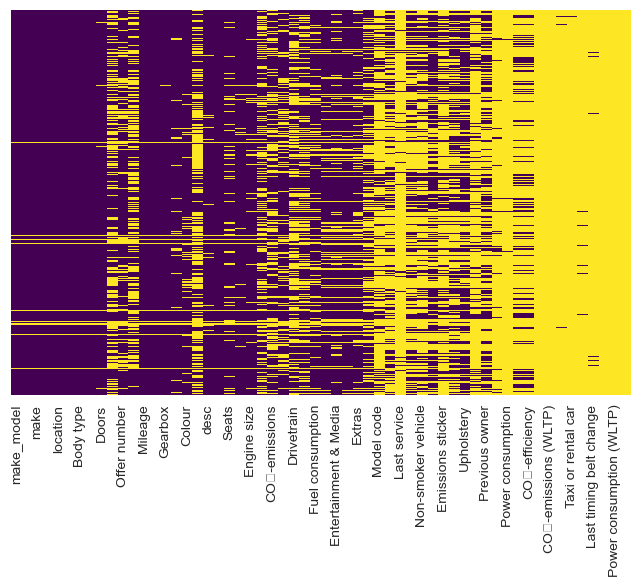

In [121]:
sns.heatmap(df1.isnull(), yticklabels=False, cbar=False, cmap='viridis');


In [122]:
df1 = clean_columns(df1)
df1.columns.tolist()

50 column names have been cleaned

['make_model',
 'short_description',
 'make',
 'model',
 'location',
 'price',
 'body_type',
 'type',
 'doors',
 'country_version',
 'offer_number',
 'warranty',
 'mileage',
 'first_registration',
 'gearbox',
 'fuel_type',
 'colour',
 'paint',
 'desc',
 'seller',
 'seats',
 'power',
 'engine_size',
 'gears',
 'co_emissions',
 'manufacturer_colour',
 'drivetrain',
 'cylinders',
 'fuel_consumption',
 'comfort_&_convenience',
 'entertainment_&_media',
 'safety_&_security',
 'extras',
 'empty_weight',
 'model_code',
 'general_inspection',
 'last_service',
 'full_service_history',
 'non_smoker_vehicle',
 'emission_class',
 'emissions_sticker',
 'upholstery_colour',
 'upholstery',
 'production_date',
 'previous_owner',
 'other_fuel_types',
 'power_consumption',
 'energy_efficiency_class',
 'co_efficiency',
 'fuel_consumption_wltp',
 'co_emissions_wltp',
 'available_from',
 'taxi_or_rental_car',
 'availability',
 'last_timing_belt_change',
 'electric_range_wltp',
 'power_consumption_wltp',
 '

In [123]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

In [124]:
missing_values(df1)

,Missing_Number,Missing_Percent
battery_ownership,29473,99.976
power_consumption_wltp,29464,99.946
electric_range_wltp,29464,99.946
fuel_consumption_wltp,29380,99.661
co_emissions_wltp,29364,99.607
availability,29179,98.979
available_from,29087,98.667
taxi_or_rental_car,29058,98.569
power_consumption,28965,98.253
last_timing_belt_change,28908,98.060


In [125]:
df1.make = df.make.str.strip()
df1.make.sample(5)

17021     Toyota
27275      Volvo
28536      Volvo
28346      Volvo
5543     Renault
Name: make, dtype: object

In [126]:
df1

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co_efficiency,fuel_consumption_wltp,co_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership
0,Mercedes-Benz A 160,CDi,Mercedes-Benz,"[\n, A 160 ,\n]","P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","€ 16,950.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7468157, \n]","[\n, 24 months, \n]","120,200 km",06/2016,[\nManual\n],Diesel,Black,Metallic,"[ , Precio al contado: 16950 euros, , , Vehí...",Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,Mercedes-Benz,"[\n, EQE 350 ,\n]","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","€ 80,900.-","[\n, Compact, \n]","[\n, Pre-registered, \n]","[\n, 4, \n]","[\n, Spain, \n]","[\n, 7054863, \n]","[\n, 24 months, \n]","5,000 km",06/2022,[\nAutomatic\n],Electric,NaN,NaN,"[ , Precio al contado: 88900 euros, , AUTO OJ...",Dealer,"[\n, 5, \n]",[\n215 kW (292 hp)\n],[\n1 cc\n],[\n9\n],0 g/km (comb.),Negro Obsidiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,Mercedes-Benz,"[\n, A 45 AMG ,\n]","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","€ 69,900.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7410454, \n]","[\n, 12 months, \n]","18,900 km",07/2020,[\nAutomatic\n],Gasoline,Grey,NaN,"[Gris MANUFAKTUR mountaingrau magno, , Linea/...",Dealer,"[\n, 5, \n]",[\n310 kW (421 hp)\n],"[\n1,991 cc\n]",[\n8\n],NaN,Mountaingrau magno,"[\n, 4WD, \n]",[\n4\n],"[[8.4 l/100 km (comb.)], [10.9 l/100 km (city)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,Mercedes-Benz,"[\n, A 35 AMG ,\n]","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","€ 46,990.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7464503, \n]","[\n, 12 months, \n]","18,995 km",01/2020,[\nAutomatic\n],Gasoline,Yellow,NaN,"[ , Precio al contado: 48990 euros, , , BONI...",Dealer,"[\n, 5, \n]",[\n225 kW (306 hp)\n],"[\n1,991 cc\n]",[\n7\n],NaN,Amarillo Sol,"[\n, 4WD, \n]",[\n4\n],"[[7.3 l/100 km (comb.)], [9.3 l/100 km (city)]...","[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E...",[Sport seats],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,Mercedes-Benz,"[\n, A 45 AMG ,\n]","CARRIL ARAGONES 4, 30007 CASILLAS, ES","€ 16,800.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7127931, \n]","[\n, 12 months, \n]","197,000 km",09/2015,[\nAutomatic\n],Diesel,White,Metallic,"[ , Precio al contado: 17400 euros, , Vehícul...",Dealer,"[\n, 5, \n]",[\n100 kW (136 hp)\n],"[\n2,143 cc\n]",[\n7\n],NaN,NaN,"[\n, 4WD, \n]",[\n4\n],"[[4.9 l/100 km (comb.)], [5.7 l/100 km (city)]...","[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E...",NaN,"[\n1,545 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [127]:
df1.model = df1.model.map(lambda x : x[0].strip(",\n ") if type(x) == list else x)

In [128]:
df1

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co_efficiency,fuel_consumption_wltp,co_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership
0,Mercedes-Benz A 160,CDi,Mercedes-Benz,A 160,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","€ 16,950.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7468157, \n]","[\n, 24 months, \n]","120,200 km",06/2016,[\nManual\n],Diesel,Black,Metallic,"[ , Precio al contado: 16950 euros, , , Vehí...",Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,Mercedes-Benz,EQE 350,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","€ 80,900.-","[\n, Compact, \n]","[\n, Pre-registered, \n]","[\n, 4, \n]","[\n, Spain, \n]","[\n, 7054863, \n]","[\n, 24 months, \n]","5,000 km",06/2022,[\nAutomatic\n],Electric,NaN,NaN,"[ , Precio al contado: 88900 euros, , AUTO OJ...",Dealer,"[\n, 5, \n]",[\n215 kW (292 hp)\n],[\n1 cc\n],[\n9\n],0 g/km (comb.),Negro Obsidiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,Mercedes-Benz,A 45 AMG,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","€ 69,900.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7410454, \n]","[\n, 12 months, \n]","18,900 km",07/2020,[\nAutomatic\n],Gasoline,Grey,NaN,"[Gris MANUFAKTUR mountaingrau magno, , Linea/...",Dealer,"[\n, 5, \n]",[\n310 kW (421 hp)\n],"[\n1,991 cc\n]",[\n8\n],NaN,Mountaingrau magno,"[\n, 4WD, \n]",[\n4\n],"[[8.4 l/100 km (comb.)], [10.9 l/100 km (city)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,Mercedes-Benz,A 35 AMG,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES","€ 46,990.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7464503, \n]","[\n, 12 months, \n]","18,995 km",01/2020,[\nAutomatic\n],Gasoline,Yellow,NaN,"[ , Precio al contado: 48990 euros, , , BONI...",Dealer,"[\n, 5, \n]",[\n225 kW (306 hp)\n],"[\n1,991 cc\n]",[\n7\n],NaN,Amarillo Sol,"[\n, 4WD, \n]",[\n4\n],"[[7.3 l/100 km (comb.)], [9.3 l/100 km (city)]...","[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E...",[Sport seats],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,Mercedes-Benz,A 45 AMG,"CARRIL ARAGONES 4, 30007 CASILLAS, ES","€ 16,800.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7127931, \n]","[\n, 12 months, \n]","197,000 km",09/2015,[\nAutomatic\n],Diesel,White,Metallic,"[ , Precio al contado: 17400 euros, , Vehícul...",Dealer,"[\n, 5, \n]",[\n100 kW (136 hp)\n],"[\n2,143 cc\n]",[\n7\n],NaN,NaN,"[\n, 4WD, \n]",[\n4\n],"[[4.9 l/100 km (comb.)], [5.7 l/100 km (city)]...","[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E...",NaN,"[\n1,545 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [129]:
df1.price = df1.price.str.strip("€.- ").str.replace(",","").astype(float)


In [130]:
df1

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co_efficiency,fuel_consumption_wltp,co_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership
0,Mercedes-Benz A 160,CDi,Mercedes-Benz,A 160,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.000,"[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7468157, \n]","[\n, 24 months, \n]","120,200 km",06/2016,[\nManual\n],Diesel,Black,Metallic,"[ , Precio al contado: 16950 euros, , , Vehí...",Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,Mercedes-Benz,EQE 350,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.000,"[\n, Compact, \n]","[\n, Pre-registered, \n]","[\n, 4, \n]","[\n, Spain, \n]","[\n, 7054863, \n]","[\n, 24 months, \n]","5,000 km",06/2022,[\nAutomatic\n],Electric,NaN,NaN,"[ , Precio al contado: 88900 euros, , AUTO OJ...",Dealer,"[\n, 5, \n]",[\n215 kW (292 hp)\n],[\n1 cc\n],[\n9\n],0 g/km (comb.),Negro Obsidiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,Mercedes-Benz,A 45 AMG,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.000,"[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7410454, \n]","[\n, 12 months, \n]","18,900 km",07/2020,[\nAutomatic\n],Gasoline,Grey,NaN,"[Gris MANUFAKTUR mountaingrau magno, , Linea/...",Dealer,"[\n, 5, \n]",[\n310 kW (421 hp)\n],"[\n1,991 cc\n]",[\n8\n],NaN,Mountaingrau magno,"[\n, 4WD, \n]",[\n4\n],"[[8.4 l/100 km (comb.)], [10.9 l/100 km (city)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,Mercedes-Benz,A 35 AMG,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.000,"[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7464503, \n]","[\n, 12 months, \n]","18,995 km",01/2020,[\nAutomatic\n],Gasoline,Yellow,NaN,"[ , Precio al contado: 48990 euros, , , BONI...",Dealer,"[\n, 5, \n]",[\n225 kW (306 hp)\n],"[\n1,991 cc\n]",[\n7\n],NaN,Amarillo Sol,"[\n, 4WD, \n]",[\n4\n],"[[7.3 l/100 km (comb.)], [9.3 l/100 km (city)]...","[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E...",[Sport seats],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,Mercedes-Benz,A 45 AMG,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.000,"[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7127931, \n]","[\n, 12 months, \n]","197,000 km",09/2015,[\nAutomatic\n],Diesel,White,Metallic,"[ , Precio al contado: 17400 euros, , Vehícul...",Dealer,"[\n, 5, \n]",[\n100 kW (136 hp)\n],"[\n2,143 cc\n]",[\n7\n],NaN,NaN,"[\n, 4WD, \n]",[\n4\n],"[[4.9 l/100 km (comb.)], [5.7 l/100 km (city)]...","[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E...",NaN,"[\n1,545 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [131]:
df1.body_type = df1.body_type.map(lambda x : x[0].split(",")[1].strip() if type(x) == list else x)


In [132]:
df1

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co_efficiency,fuel_consumption_wltp,co_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership
0,Mercedes-Benz A 160,CDi,Mercedes-Benz,A 160,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.000,Compact,"[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7468157, \n]","[\n, 24 months, \n]","120,200 km",06/2016,[\nManual\n],Diesel,Black,Metallic,"[ , Precio al contado: 16950 euros, , , Vehí...",Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,Mercedes-Benz,EQE 350,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.000,Compact,"[\n, Pre-registered, \n]","[\n, 4, \n]","[\n, Spain, \n]","[\n, 7054863, \n]","[\n, 24 months, \n]","5,000 km",06/2022,[\nAutomatic\n],Electric,NaN,NaN,"[ , Precio al contado: 88900 euros, , AUTO OJ...",Dealer,"[\n, 5, \n]",[\n215 kW (292 hp)\n],[\n1 cc\n],[\n9\n],0 g/km (comb.),Negro Obsidiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,Mercedes-Benz,A 45 AMG,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.000,Compact,"[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7410454, \n]","[\n, 12 months, \n]","18,900 km",07/2020,[\nAutomatic\n],Gasoline,Grey,NaN,"[Gris MANUFAKTUR mountaingrau magno, , Linea/...",Dealer,"[\n, 5, \n]",[\n310 kW (421 hp)\n],"[\n1,991 cc\n]",[\n8\n],NaN,Mountaingrau magno,"[\n, 4WD, \n]",[\n4\n],"[[8.4 l/100 km (comb.)], [10.9 l/100 km (city)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,Mercedes-Benz,A 35 AMG,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.000,Compact,"[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7464503, \n]","[\n, 12 months, \n]","18,995 km",01/2020,[\nAutomatic\n],Gasoline,Yellow,NaN,"[ , Precio al contado: 48990 euros, , , BONI...",Dealer,"[\n, 5, \n]",[\n225 kW (306 hp)\n],"[\n1,991 cc\n]",[\n7\n],NaN,Amarillo Sol,"[\n, 4WD, \n]",[\n4\n],"[[7.3 l/100 km (comb.)], [9.3 l/100 km (city)]...","[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E...",[Sport seats],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,Mercedes-Benz,A 45 AMG,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.000,Compact,"[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7127931, \n]","[\n, 12 months, \n]","197,000 km",09/2015,[\nAutomatic\n],Diesel,White,Metallic,"[ , Precio al contado: 17400 euros, , Vehícul...",Dealer,"[\n, 5, \n]",[\n100 kW (136 hp)\n],"[\n2,143 cc\n]",[\n7\n],NaN,NaN,"[\n, 4WD, \n]",[\n4\n],"[[4.9 l/100 km (comb.)], [5.7 l/100 km (city)]...","[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E...",NaN,"[\n1,545 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [133]:
df1.type = df1.type.map(lambda x : x[0].split(",")[1].strip() if type(x) == list else x)


In [134]:
df1

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co_efficiency,fuel_consumption_wltp,co_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership
0,Mercedes-Benz A 160,CDi,Mercedes-Benz,A 160,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.000,Compact,Used,"[\n, 5, \n]","[\n, Spain, \n]","[\n, 7468157, \n]","[\n, 24 months, \n]","120,200 km",06/2016,[\nManual\n],Diesel,Black,Metallic,"[ , Precio al contado: 16950 euros, , , Vehí...",Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,Mercedes-Benz,EQE 350,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.000,Compact,Pre-registered,"[\n, 4, \n]","[\n, Spain, \n]","[\n, 7054863, \n]","[\n, 24 months, \n]","5,000 km",06/2022,[\nAutomatic\n],Electric,NaN,NaN,"[ , Precio al contado: 88900 euros, , AUTO OJ...",Dealer,"[\n, 5, \n]",[\n215 kW (292 hp)\n],[\n1 cc\n],[\n9\n],0 g/km (comb.),Negro Obsidiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,Mercedes-Benz,A 45 AMG,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.000,Compact,Used,"[\n, 5, \n]","[\n, Spain, \n]","[\n, 7410454, \n]","[\n, 12 months, \n]","18,900 km",07/2020,[\nAutomatic\n],Gasoline,Grey,NaN,"[Gris MANUFAKTUR mountaingrau magno, , Linea/...",Dealer,"[\n, 5, \n]",[\n310 kW (421 hp)\n],"[\n1,991 cc\n]",[\n8\n],NaN,Mountaingrau magno,"[\n, 4WD, \n]",[\n4\n],"[[8.4 l/100 km (comb.)], [10.9 l/100 km (city)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,Mercedes-Benz,A 35 AMG,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.000,Compact,Used,"[\n, 5, \n]","[\n, Spain, \n]","[\n, 7464503, \n]","[\n, 12 months, \n]","18,995 km",01/2020,[\nAutomatic\n],Gasoline,Yellow,NaN,"[ , Precio al contado: 48990 euros, , , BONI...",Dealer,"[\n, 5, \n]",[\n225 kW (306 hp)\n],"[\n1,991 cc\n]",[\n7\n],NaN,Amarillo Sol,"[\n, 4WD, \n]",[\n4\n],"[[7.3 l/100 km (comb.)], [9.3 l/100 km (city)]...","[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E...",[Sport seats],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,Mercedes-Benz,A 45 AMG,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.000,Compact,Used,"[\n, 5, \n]","[\n, Spain, \n]","[\n, 7127931, \n]","[\n, 12 months, \n]","197,000 km",09/2015,[\nAutomatic\n],Diesel,White,Metallic,"[ , Precio al contado: 17400 euros, , Vehícul...",Dealer,"[\n, 5, \n]",[\n100 kW (136 hp)\n],"[\n2,143 cc\n]",[\n7\n],NaN,NaN,"[\n, 4WD, \n]",[\n4\n],"[[4.9 l/100 km (comb.)], [5.7 l/100 km (city)]...","[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E...",NaN,"[\n1,545 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [135]:
df1.doors = df1.doors.map(lambda x : x[0].split(",")[1] if type(x) == list else x).astype(float)


In [136]:
df1

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co_efficiency,fuel_consumption_wltp,co_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership
0,Mercedes-Benz A 160,CDi,Mercedes-Benz,A 160,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.000,Compact,Used,5.000,"[\n, Spain, \n]","[\n, 7468157, \n]","[\n, 24 months, \n]","120,200 km",06/2016,[\nManual\n],Diesel,Black,Metallic,"[ , Precio al contado: 16950 euros, , , Vehí...",Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,Mercedes-Benz,EQE 350,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.000,Compact,Pre-registered,4.000,"[\n, Spain, \n]","[\n, 7054863, \n]","[\n, 24 months, \n]","5,000 km",06/2022,[\nAutomatic\n],Electric,NaN,NaN,"[ , Precio al contado: 88900 euros, , AUTO OJ...",Dealer,"[\n, 5, \n]",[\n215 kW (292 hp)\n],[\n1 cc\n],[\n9\n],0 g/km (comb.),Negro Obsidiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,Mercedes-Benz,A 45 AMG,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.000,Compact,Used,5.000,"[\n, Spain, \n]","[\n, 7410454, \n]","[\n, 12 months, \n]","18,900 km",07/2020,[\nAutomatic\n],Gasoline,Grey,NaN,"[Gris MANUFAKTUR mountaingrau magno, , Linea/...",Dealer,"[\n, 5, \n]",[\n310 kW (421 hp)\n],"[\n1,991 cc\n]",[\n8\n],NaN,Mountaingrau magno,"[\n, 4WD, \n]",[\n4\n],"[[8.4 l/100 km (comb.)], [10.9 l/100 km (city)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,Mercedes-Benz,A 35 AMG,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.000,Compact,Used,5.000,"[\n, Spain, \n]","[\n, 7464503, \n]","[\n, 12 months, \n]","18,995 km",01/2020,[\nAutomatic\n],Gasoline,Yellow,NaN,"[ , Precio al contado: 48990 euros, , , BONI...",Dealer,"[\n, 5, \n]",[\n225 kW (306 hp)\n],"[\n1,991 cc\n]",[\n7\n],NaN,Amarillo Sol,"[\n, 4WD, \n]",[\n4\n],"[[7.3 l/100 km (comb.)], [9.3 l/100 km (city)]...","[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E...",[Sport seats],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,Mercedes-Benz,A 45 AMG,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.000,Compact,Used,5.000,"[\n, Spain, \n]","[\n, 7127931, \n]","[\n, 12 months, \n]","197,000 km",09/2015,[\nAutomatic\n],Diesel,White,Metallic,"[ , Precio al contado: 17400 euros, , Vehícul...",Dealer,"[\n, 5, \n]",[\n100 kW (136 hp)\n],"[\n2,143 cc\n]",[\n7\n],NaN,NaN,"[\n, 4WD, \n]",[\n4\n],"[[4.9 l/100 km (comb.)], [5.7 l/100 km (city)]...","[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E...",NaN,"[\n1,545 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [137]:
df1.country_version = df1.country_version.map(lambda x : x[0].split(",")[1].strip() if type(x) == list else x)


In [138]:
df1

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co_efficiency,fuel_consumption_wltp,co_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership
0,Mercedes-Benz A 160,CDi,Mercedes-Benz,A 160,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.000,Compact,Used,5.000,Spain,"[\n, 7468157, \n]","[\n, 24 months, \n]","120,200 km",06/2016,[\nManual\n],Diesel,Black,Metallic,"[ , Precio al contado: 16950 euros, , , Vehí...",Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,Mercedes-Benz,EQE 350,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.000,Compact,Pre-registered,4.000,Spain,"[\n, 7054863, \n]","[\n, 24 months, \n]","5,000 km",06/2022,[\nAutomatic\n],Electric,NaN,NaN,"[ , Precio al contado: 88900 euros, , AUTO OJ...",Dealer,"[\n, 5, \n]",[\n215 kW (292 hp)\n],[\n1 cc\n],[\n9\n],0 g/km (comb.),Negro Obsidiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,Mercedes-Benz,A 45 AMG,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.000,Compact,Used,5.000,Spain,"[\n, 7410454, \n]","[\n, 12 months, \n]","18,900 km",07/2020,[\nAutomatic\n],Gasoline,Grey,NaN,"[Gris MANUFAKTUR mountaingrau magno, , Linea/...",Dealer,"[\n, 5, \n]",[\n310 kW (421 hp)\n],"[\n1,991 cc\n]",[\n8\n],NaN,Mountaingrau magno,"[\n, 4WD, \n]",[\n4\n],"[[8.4 l/100 km (comb.)], [10.9 l/100 km (city)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,Mercedes-Benz,A 35 AMG,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.000,Compact,Used,5.000,Spain,"[\n, 7464503, \n]","[\n, 12 months, \n]","18,995 km",01/2020,[\nAutomatic\n],Gasoline,Yellow,NaN,"[ , Precio al contado: 48990 euros, , , BONI...",Dealer,"[\n, 5, \n]",[\n225 kW (306 hp)\n],"[\n1,991 cc\n]",[\n7\n],NaN,Amarillo Sol,"[\n, 4WD, \n]",[\n4\n],"[[7.3 l/100 km (comb.)], [9.3 l/100 km (city)]...","[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E...",[Sport seats],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,Mercedes-Benz,A 45 AMG,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.000,Compact,Used,5.000,Spain,"[\n, 7127931, \n]","[\n, 12 months, \n]","197,000 km",09/2015,[\nAutomatic\n],Diesel,White,Metallic,"[ , Precio al contado: 17400 euros, , Vehícul...",Dealer,"[\n, 5, \n]",[\n100 kW (136 hp)\n],"[\n2,143 cc\n]",[\n7\n],NaN,NaN,"[\n, 4WD, \n]",[\n4\n],"[[4.9 l/100 km (comb.)], [5.7 l/100 km (city)]...","[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E...",NaN,"[\n1,545 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29475,Volvo S40,2.4i Momentum/ Airco/ NAP/ APK/ Elek. Ra

In [139]:
df1.offer_number = df1.offer_number.map(lambda x : x[0].strip("\n ,") if type(x) == list else x)


In [140]:
df1.warranty = df1.warranty.map(lambda x : x[0].strip("\n ,") if type(x) == list else x)


In [141]:
df1.mileage = df1.mileage.str.strip("km ").str.replace(",", "").astype(float)


In [142]:
df1.first_registration = df1.first_registration.str.extract("/(\d+)")


In [143]:
df1.gearbox = df1.gearbox.apply(lambda x : x[0].strip() if type(x) == list else x).str.title()


In [144]:
df1.desc = df1.desc.apply(lambda x : "".join(x).strip() if type(x) == list else x).str.title()


In [145]:
df1.seats = df1.seats.map(lambda x : x[0].strip(",\n ") if type(x) == list else x).astype(float)


- power

In [146]:
df1

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co_efficiency,fuel_consumption_wltp,co_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership
0,Mercedes-Benz A 160,CDi,Mercedes-Benz,A 160,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.000,Compact,Used,5.000,Spain,7468157,24 months,120200.000,2016,Manual,Diesel,Black,Metallic,Precio Al Contado: 16950 Euros Vehículo Con H...,Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,Mercedes-Benz,EQE 350,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.000,Compact,Pre-registered,4.000,Spain,7054863,24 months,5000.000,2022,Automatic,Electric,NaN,NaN,Precio Al Contado: 88900 Euros Auto Oja S.A. -...,Dealer,5.000,[\n215 kW (292 hp)\n],[\n1 cc\n],[\n9\n],0 g/km (comb.),Negro Obsidiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,Mercedes-Benz,A 45 AMG,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.000,Compact,Used,5.000,Spain,7410454,12 months,18900.000,2020,Automatic,Gasoline,Grey,NaN,Gris Manufaktur Mountaingrau Magno Linea/Estil...,Dealer,5.000,[\n310 kW (421 hp)\n],"[\n1,991 cc\n]",[\n8\n],NaN,Mountaingrau magno,"[\n, 4WD, \n]",[\n4\n],"[[8.4 l/100 km (comb.)], [10.9 l/100 km (city)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,Mercedes-Benz,A 35 AMG,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.000,Compact,Used,5.000,Spain,7464503,12 months,18995.000,2020,Automatic,Gasoline,Yellow,NaN,Precio Al Contado: 48990 Euros Bonificacion P...,Dealer,5.000,[\n225 kW (306 hp)\n],"[\n1,991 cc\n]",[\n7\n],NaN,Amarillo Sol,"[\n, 4WD, \n]",[\n4\n],"[[7.3 l/100 km (comb.)], [9.3 l/100 km (city)]...","[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E...",[Sport seats],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,Mercedes-Benz,A 45 AMG,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.000,Compact,Used,5.000,Spain,7127931,12 months,197000.000,2015,Automatic,Diesel,White,Metallic,Precio Al Contado: 17400 Euros Vehículo En Per...,Dealer,5.000,[\n100 kW (136 hp)\n],"[\n2,143 cc\n]",[\n7\n],NaN,NaN,"[\n, 4WD, \n]",[\n4\n],"[[4.9 l/100 km (comb.)], [5.7 l/100 km (city)]...","[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E...",NaN,"[\n1,545 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29475,Volvo S40,2.4i Momentum/ Airco/ NAP/ APK/ Elek. Ramen,Volvo,S40,"Stobbeweg 6, 2461 EX TER AAR, NL",5499.000,Sedan,Used,4.000,NaN,09-PF-XS,NaN,145000.000,2004,Automatic,Gasoline,Grey,NaN,Een Goed Rijdende Auto Met Apk + Nap + Elektri...,Dealer,5.000,[\n125 kW (17

In [147]:
df1.first_registration = df1.first_registration.str.extract("\(\d+)").astype(float)


error: unbalanced parenthesis at position 5

In [148]:
df1.power = df1.power.map(lambda x : x[0].strip("\n ").replace(",","") if type(x) == list else x).str.extract(".*\((\d+.*\d*) ").astype(float)

In [149]:
df1.engine_size = (df1.engine_size.map(lambda x: x[0].strip("\n c").replace(",", "") if type(x) == list else x).astype(float) / 1000).astype(str).str.extract("(\d+\.*\d)").astype(float)

In [150]:
df1.gears = df1.gears.map(lambda x : x[0].strip("\n ") if type(x) == list else x).astype(float)


In [151]:
df1.co_emissions = df1.co_emissions.apply(lambda x : re.search("(\d+\.*\d*)", x).group(1) if type(x) == str else x).astype(float)

In [152]:
df1.cylinders = df1.cylinders.map(lambda x : x[0].strip("\n ") if type(x) == list else x).astype(float)

In [153]:
df1.fuel_consumption = df1.fuel_consumption.apply(lambda x: "".join([item for sublist in x for item in sublist]) if isinstance(x, list) else x)

In [154]:
limitPer = len(df1) * .80
df1 = df1.dropna(thresh=limitPer, axis=1)

In [155]:
df1

,make_model,short_description,make,model,location,price,body_type,type,doors,mileage,first_registration,gearbox,fuel_type,colour,desc,seller,seats,power,engine_size,comfort_&_convenience,entertainment_&_media,safety_&_security
0,Mercedes-Benz A 160,CDi,Mercedes-Benz,A 160,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.000,Compact,Used,5.000,120200.000,2016,Manual,Diesel,Black,Precio Al Contado: 16950 Euros Vehículo Con H...,Dealer,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,Mercedes-Benz,EQE 350,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.000,Compact,Pre-registered,4.000,5000.000,2022,Automatic,Electric,NaN,Precio Al Contado: 88900 Euros Auto Oja S.A. -...,Dealer,5.000,292.000,0.000,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,Mercedes-Benz,A 45 AMG,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.000,Compact,Used,5.000,18900.000,2020,Automatic,Gasoline,Grey,Gris Manufaktur Mountaingrau Magno Linea/Estil...,Dealer,5.000,421.000,1.900,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,Mercedes-Benz,A 35 AMG,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.000,Compact,Used,5.000,18995.000,2020,Automatic,Gasoline,Yellow,Precio Al Contado: 48990 Euros Bonificacion P...,Dealer,5.000,306.000,1.900,"[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E..."
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,Mercedes-Benz,A 45 AMG,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.000,Compact,Used,5.000,197000.000,2015,Automatic,Diesel,White,Precio Al Contado: 17400 Euros Vehículo En Per...,Dealer,5.000,136.000,2.100,"[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29475,Volvo S40,2.4i Momentum/ Airco/ NAP/ APK/ Elek. Ramen,Volvo,S40,"Stobbeweg 6, 2461 EX TER AAR, NL",5499.000,Sedan,Used,4.000,145000.000,2004,Automatic,Gasoline,Grey,Een Goed Rijdende Auto Met Apk + Nap + Elektri...,Dealer,5.000,170.000,2.400,"[Air conditioning, Armrest, Automatic climate ...","[On-board computer, Radio]","[ABS, Central door lock, Central door lock wit..."
29476,Volvo C30,1.6 D DRIVe Start/Stop R-design,Volvo,C30,"Sur rendez-vous, 5060 Sambreville, BE",7300.000,Sedan,Used,3.000,96000.000,2011,Manual,Diesel (Particle filter),Grey,*** Volvo C30 2011 Tres Propre En Parfait Etat...,Dealer,4.000,114.000,1.500,"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[ABS, Alarm system, Central door lock with rem..."
29477,Volvo S90,T5 AUT(8) MOMENTUM BUSINESS SCHUIFDAK 360GR CA...,Volvo,S90,"Bergambachterstraat 5, 2871 JB SCHOONHOVEN, NL",29900.000,Sedan,Used,4.000,94343.000,2017,Automatic,Gasoline,Blue,Bekijk Deze Auto In Unieke 360 Graden Presenta...,Dealer,5.000,254.000,1.900,"[Air conditioning, Armrest, Automatic climate ...","[Android Auto, Apple CarPlay, Bluetooth, Hands...","[Adaptive Cruise Control, Adaptive headlights,..."
29478,Volvo S80,2.9 Executive G. NETTE AUTO! LEER! NAVI! CRUIS...,Volvo,S80,"Lage Ham 106, 5102 AE DONGEN, NL",4440.000,Sedan,Used,4.000,230047.000,2002,Automatic,Super 95,Grey,Youngtimer !Bedrijfsinformatieneem Voor U Wilt...,Dealer,5.000,200.000,2.900,"[Air conditioning, Armrest, Cruise control, El...",[On-board computer],"[ABS, Alarm system, Central door lock, Central..."


In [156]:
df1

,make_model,short_description,make,model,location,price,body_type,type,doors,mileage,first_registration,gearbox,fuel_type,colour,desc,seller,seats,power,engine_size,comfort_&_convenience,entertainment_&_media,safety_&_security
0,Mercedes-Benz A 160,CDi,Mercedes-Benz,A 160,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.000,Compact,Used,5.000,120200.000,2016,Manual,Diesel,Black,Precio Al Contado: 16950 Euros Vehículo Con H...,Dealer,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,Mercedes-Benz,EQE 350,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.000,Compact,Pre-registered,4.000,5000.000,2022,Automatic,Electric,NaN,Precio Al Contado: 88900 Euros Auto Oja S.A. -...,Dealer,5.000,292.000,0.000,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,Mercedes-Benz,A 45 AMG,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.000,Compact,Used,5.000,18900.000,2020,Automatic,Gasoline,Grey,Gris Manufaktur Mountaingrau Magno Linea/Estil...,Dealer,5.000,421.000,1.900,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,Mercedes-Benz,A 35 AMG,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.000,Compact,Used,5.000,18995.000,2020,Automatic,Gasoline,Yellow,Precio Al Contado: 48990 Euros Bonificacion P...,Dealer,5.000,306.000,1.900,"[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E..."
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,Mercedes-Benz,A 45 AMG,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.000,Compact,Used,5.000,197000.000,2015,Automatic,Diesel,White,Precio Al Contado: 17400 Euros Vehículo En Per...,Dealer,5.000,136.000,2.100,"[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29475,Volvo S40,2.4i Momentum/ Airco/ NAP/ APK/ Elek. Ramen,Volvo,S40,"Stobbeweg 6, 2461 EX TER AAR, NL",5499.000,Sedan,Used,4.000,145000.000,2004,Automatic,Gasoline,Grey,Een Goed Rijdende Auto Met Apk + Nap + Elektri...,Dealer,5.000,170.000,2.400,"[Air conditioning, Armrest, Automatic climate ...","[On-board computer, Radio]","[ABS, Central door lock, Central door lock wit..."
29476,Volvo C30,1.6 D DRIVe Start/Stop R-design,Volvo,C30,"Sur rendez-vous, 5060 Sambreville, BE",7300.000,Sedan,Used,3.000,96000.000,2011,Manual,Diesel (Particle filter),Grey,*** Volvo C30 2011 Tres Propre En Parfait Etat...,Dealer,4.000,114.000,1.500,"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[ABS, Alarm system, Central door lock with rem..."
29477,Volvo S90,T5 AUT(8) MOMENTUM BUSINESS SCHUIFDAK 360GR CA...,Volvo,S90,"Bergambachterstraat 5, 2871 JB SCHOONHOVEN, NL",29900.000,Sedan,Used,4.000,94343.000,2017,Automatic,Gasoline,Blue,Bekijk Deze Auto In Unieke 360 Graden Presenta...,Dealer,5.000,254.000,1.900,"[Air conditioning, Armrest, Automatic climate ...","[Android Auto, Apple CarPlay, Bluetooth, Hands...","[Adaptive Cruise Control, Adaptive headlights,..."
29478,Volvo S80,2.9 Executive G. NETTE AUTO! LEER! NAVI! CRUIS...,Volvo,S80,"Lage Ham 106, 5102 AE DONGEN, NL",4440.000,Sedan,Used,4.000,230047.000,2002,Automatic,Super 95,Grey,Youngtimer !Bedrijfsinformatieneem Voor U Wilt...,Dealer,5.000,200.000,2.900,"[Air conditioning, Armrest, Cruise control, El...",[On-board computer],"[ABS, Alarm system, Central door lock, Central..."


In [157]:
df1.drop("desc", axis=1, inplace=True)

/var/folders/wd/1mnthb0d6l1fqh4rd8gc0lbm0000gn/T/ipykernel_3977/3830257273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop("desc", axis=1, inplace=True)


In [158]:
df1.drop('power', axis=1, inplace=True)

/var/folders/wd/1mnthb0d6l1fqh4rd8gc0lbm0000gn/T/ipykernel_3977/23935679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('power', axis=1, inplace=True)


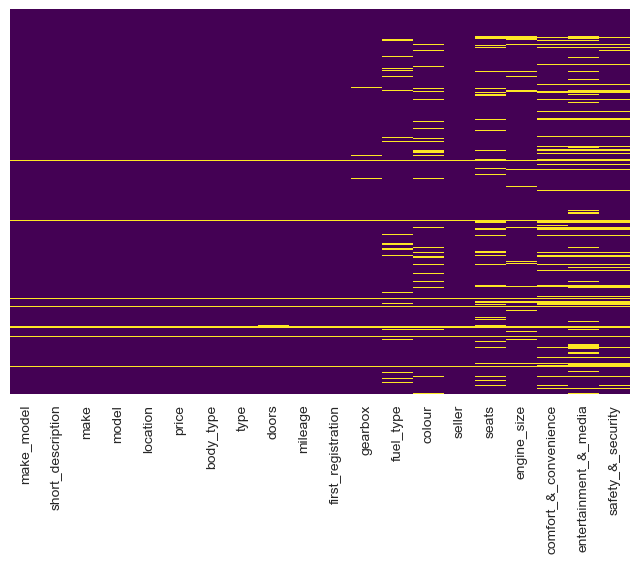

In [159]:
sns.heatmap(df1.isnull(), yticklabels=False, cbar=False, cmap='viridis');


In [160]:
missing_values(df1)

,Missing_Number,Missing_Percent
entertainment_&_media,5836,19.796
safety_&_security,4065,13.789
comfort_&_convenience,4047,13.728
seats,3975,13.484
fuel_type,2637,8.945
colour,2574,8.731
engine_size,2253,7.642
doors,1209,4.101
gearbox,1098,3.725
first_registration,852,2.890


In [161]:
df1

,make_model,short_description,make,model,location,price,body_type,type,doors,mileage,first_registration,gearbox,fuel_type,colour,seller,seats,engine_size,comfort_&_convenience,entertainment_&_media,safety_&_security
0,Mercedes-Benz A 160,CDi,Mercedes-Benz,A 160,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.000,Compact,Used,5.000,120200.000,2016,Manual,Diesel,Black,Dealer,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,Mercedes-Benz,EQE 350,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.000,Compact,Pre-registered,4.000,5000.000,2022,Automatic,Electric,NaN,Dealer,5.000,0.000,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,Mercedes-Benz,A 45 AMG,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.000,Compact,Used,5.000,18900.000,2020,Automatic,Gasoline,Grey,Dealer,5.000,1.900,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,Mercedes-Benz,A 35 AMG,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.000,Compact,Used,5.000,18995.000,2020,Automatic,Gasoline,Yellow,Dealer,5.000,1.900,"[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E..."
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,Mercedes-Benz,A 45 AMG,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.000,Compact,Used,5.000,197000.000,2015,Automatic,Diesel,White,Dealer,5.000,2.100,"[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29475,Volvo S40,2.4i Momentum/ Airco/ NAP/ APK/ Elek. Ramen,Volvo,S40,"Stobbeweg 6, 2461 EX TER AAR, NL",5499.000,Sedan,Used,4.000,145000.000,2004,Automatic,Gasoline,Grey,Dealer,5.000,2.400,"[Air conditioning, Armrest, Automatic climate ...","[On-board computer, Radio]","[ABS, Central door lock, Central door lock wit..."
29476,Volvo C30,1.6 D DRIVe Start/Stop R-design,Volvo,C30,"Sur rendez-vous, 5060 Sambreville, BE",7300.000,Sedan,Used,3.000,96000.000,2011,Manual,Diesel (Particle filter),Grey,Dealer,4.000,1.500,"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[ABS, Alarm system, Central door lock with rem..."
29477,Volvo S90,T5 AUT(8) MOMENTUM BUSINESS SCHUIFDAK 360GR CA...,Volvo,S90,"Bergambachterstraat 5, 2871 JB SCHOONHOVEN, NL",29900.000,Sedan,Used,4.000,94343.000,2017,Automatic,Gasoline,Blue,Dealer,5.000,1.900,"[Air conditioning, Armrest, Automatic climate ...","[Android Auto, Apple CarPlay, Bluetooth, Hands...","[Adaptive Cruise Control, Adaptive headlights,..."
29478,Volvo S80,2.9 Executive G. NETTE AUTO! LEER! NAVI! CRUIS...,Volvo,S80,"Lage Ham 106, 5102 AE DONGEN, NL",4440.000,Sedan,Used,4.000,230047.000,2002,Automatic,Super 95,Grey,Dealer,5.000,2.900,"[Air conditioning, Armrest, Cruise control, El...",[On-board computer],"[ABS, Alarm system, Central door lock, Central..."


In [162]:
perc = 75.0 
min_count =  int(((100-perc)/100)*df1.shape[1] + 1)
df1 = df1.dropna( axis=0, 
                    thresh=min_count)

In [163]:
df1

,make_model,short_description,make,model,location,price,body_type,type,doors,mileage,first_registration,gearbox,fuel_type,colour,seller,seats,engine_size,comfort_&_convenience,entertainment_&_media,safety_&_security
0,Mercedes-Benz A 160,CDi,Mercedes-Benz,A 160,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.000,Compact,Used,5.000,120200.000,2016,Manual,Diesel,Black,Dealer,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,Mercedes-Benz,EQE 350,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.000,Compact,Pre-registered,4.000,5000.000,2022,Automatic,Electric,NaN,Dealer,5.000,0.000,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,Mercedes-Benz,A 45 AMG,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.000,Compact,Used,5.000,18900.000,2020,Automatic,Gasoline,Grey,Dealer,5.000,1.900,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,Mercedes-Benz,A 35 AMG,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.000,Compact,Used,5.000,18995.000,2020,Automatic,Gasoline,Yellow,Dealer,5.000,1.900,"[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E..."
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,Mercedes-Benz,A 45 AMG,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.000,Compact,Used,5.000,197000.000,2015,Automatic,Diesel,White,Dealer,5.000,2.100,"[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29474,Volvo S90,T8 Twin Business Plus AWD Aut.,Volvo,S90,"HERMANOS LUMIERE Nº16, 29004 MALAGA, ES",37600.000,Sedan,Used,4.000,40345.000,2019,Automatic,NaN,Black,Dealer,4.000,1.900,"[Air conditioning, Automatic climate control, ...","[Bluetooth, USB]","[ABS, Central door lock, Driver-side airbag, E..."
29475,Volvo S40,2.4i Momentum/ Airco/ NAP/ APK/ Elek. Ramen,Volvo,S40,"Stobbeweg 6, 2461 EX TER AAR, NL",5499.000,Sedan,Used,4.000,145000.000,2004,Automatic,Gasoline,Grey,Dealer,5.000,2.400,"[Air conditioning, Armrest, Automatic climate ...","[On-board computer, Radio]","[ABS, Central door lock, Central door lock wit..."
29476,Volvo C30,1.6 D DRIVe Start/Stop R-design,Volvo,C30,"Sur rendez-vous, 5060 Sambreville, BE",7300.000,Sedan,Used,3.000,96000.000,2011,Manual,Diesel (Particle filter),Grey,Dealer,4.000,1.500,"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[ABS, Alarm system, Central door lock with rem..."
29477,Volvo S90,T5 AUT(8) MOMENTUM BUSINESS SCHUIFDAK 360GR CA...,Volvo,S90,"Bergambachterstraat 5, 2871 JB SCHOONHOVEN, NL",29900.000,Sedan,Used,4.000,94343.000,2017,Automatic,Gasoline,Blue,Dealer,5.000,1.900,"[Air conditioning, Armrest, Automatic climate ...","[Android Auto, Apple CarPlay, Bluetooth, Hands...","[Adaptive Cruise Control, Adaptive headlights,..."


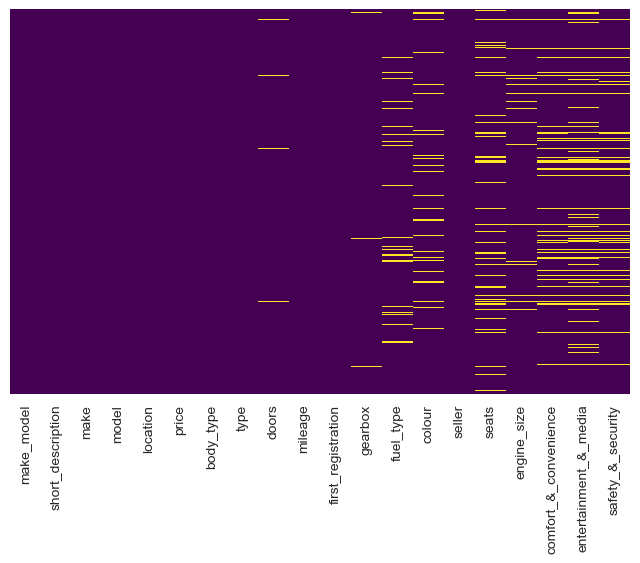

In [164]:
sns.heatmap(df1.isnull(), yticklabels=False, cbar=False, cmap='viridis');


In [165]:
df1[(df1["model"].isna())][['make_model', 'make', 'model']]


,make_model,make,model


In [166]:
df1

,make_model,short_description,make,model,location,price,body_type,type,doors,mileage,first_registration,gearbox,fuel_type,colour,seller,seats,engine_size,comfort_&_convenience,entertainment_&_media,safety_&_security
0,Mercedes-Benz A 160,CDi,Mercedes-Benz,A 160,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.000,Compact,Used,5.000,120200.000,2016,Manual,Diesel,Black,Dealer,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,Mercedes-Benz,EQE 350,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.000,Compact,Pre-registered,4.000,5000.000,2022,Automatic,Electric,NaN,Dealer,5.000,0.000,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,Mercedes-Benz,A 45 AMG,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.000,Compact,Used,5.000,18900.000,2020,Automatic,Gasoline,Grey,Dealer,5.000,1.900,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,Mercedes-Benz,A 35 AMG,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.000,Compact,Used,5.000,18995.000,2020,Automatic,Gasoline,Yellow,Dealer,5.000,1.900,"[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E..."
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,Mercedes-Benz,A 45 AMG,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.000,Compact,Used,5.000,197000.000,2015,Automatic,Diesel,White,Dealer,5.000,2.100,"[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29474,Volvo S90,T8 Twin Business Plus AWD Aut.,Volvo,S90,"HERMANOS LUMIERE Nº16, 29004 MALAGA, ES",37600.000,Sedan,Used,4.000,40345.000,2019,Automatic,NaN,Black,Dealer,4.000,1.900,"[Air conditioning, Automatic climate control, ...","[Bluetooth, USB]","[ABS, Central door lock, Driver-side airbag, E..."
29475,Volvo S40,2.4i Momentum/ Airco/ NAP/ APK/ Elek. Ramen,Volvo,S40,"Stobbeweg 6, 2461 EX TER AAR, NL",5499.000,Sedan,Used,4.000,145000.000,2004,Automatic,Gasoline,Grey,Dealer,5.000,2.400,"[Air conditioning, Armrest, Automatic climate ...","[On-board computer, Radio]","[ABS, Central door lock, Central door lock wit..."
29476,Volvo C30,1.6 D DRIVe Start/Stop R-design,Volvo,C30,"Sur rendez-vous, 5060 Sambreville, BE",7300.000,Sedan,Used,3.000,96000.000,2011,Manual,Diesel (Particle filter),Grey,Dealer,4.000,1.500,"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[ABS, Alarm system, Central door lock with rem..."
29477,Volvo S90,T5 AUT(8) MOMENTUM BUSINESS SCHUIFDAK 360GR CA...,Volvo,S90,"Bergambachterstraat 5, 2871 JB SCHOONHOVEN, NL",29900.000,Sedan,Used,4.000,94343.000,2017,Automatic,Gasoline,Blue,Dealer,5.000,1.900,"[Air conditioning, Armrest, Automatic climate ...","[Android Auto, Apple CarPlay, Bluetooth, Hands...","[Adaptive Cruise Control, Adaptive headlights,..."
